In [1]:
import os
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import metrics
import seaborn as sns

/Users/jiandanqingche/opt/anaconda3/envs/keras/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# data process
df=pd.read_csv("MCC23.csv")
df.head()

,YEAR,MO,DY,T2M,TS,PRECTOTCORR,PS,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,QV2M,WS10M,WS50M
0,2001,1,1,9.97,10.75,0.10,74.62,3.45,4.94,0.48,304.13,61.42,86.69,8.47,0.22,1.15,7.75,1.17,1.69
1,2001,1,2,10.38,11.13,0.06,74.77,4.02,5.03,0.55,304.57,71.91,89.66,9.73,0.25,1.34,7.20,1.33,1.85
2,2001,1,3,8.91,10.03,0.01,74.92,3.68,5.34,0.51,295.34,66.46,95.48,9.34,0.24,1.29,6.16,2.36,3.16
3,2001,1,4,9.73,10.58,0.00,74.82,5.16,5.18,0.71,269.09,90.52,91.53,11.73,0.27,1.37,5.98,1.78,2.64
4,2001,1,5,10.63,10.73,0.00,74.72,5.47,5.45,0.75,259.95,97.34,97.74,12.82,0.30,1.48,6.29,2.58,4.03


In [3]:
df.isnull().sum().sort_values(ascending=False)

YEAR                   0
ALLSKY_SFC_LW_DWN      0
WS10M                  0
QV2M                   0
ALLSKY_SFC_UV_INDEX    0
ALLSKY_SFC_UVB         0
ALLSKY_SFC_UVA         0
CLRSKY_SFC_PAR_TOT     0
ALLSKY_SFC_PAR_TOT     0
ALLSKY_KT              0
MO                     0
CLRSKY_SFC_SW_DWN      0
ALLSKY_SFC_SW_DWN      0
PS                     0
PRECTOTCORR            0
TS                     0
T2M                    0
DY                     0
WS50M                  0
dtype: int64

In [4]:
X=df[['WS50M','PS','WS10M','QV2M','TS','T2M','CLRSKY_SFC_PAR_TOT','ALLSKY_SFC_PAR_TOT','CLRSKY_SFC_SW_DWN','ALLSKY_SFC_LW_DWN','ALLSKY_SFC_SW_DWN']]
Y=df[['PRECTOTCORR']]

In [5]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=10)

In [6]:
X_train.head()

,WS50M,PS,WS10M,QV2M,TS,T2M,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_SW_DWN
2941,3.74,74.75,2.51,6.35,10.30,9.52,101.82,97.16,5.65,276.69,5.43
7289,2.85,74.46,1.71,6.84,12.00,11.80,90.56,78.72,5.13,282.09,4.47
1443,4.77,74.93,3.55,6.35,7.35,6.75,95.33,54.34,5.24,303.95,2.94
3664,2.16,74.74,1.45,5.92,8.80,7.76,99.99,84.68,5.57,285.27,4.74
4291,3.49,74.42,2.12,10.56,14.72,13.98,121.74,79.61,6.70,343.31,4.29


In [7]:
#set up model parameter
params_xgb = {'objective': 'reg:squarederror','n_estimators': 2000,  'max_depth':5,'reg_alpha': 0,'reg_lambda': 1,}


In [8]:
#建模
model = xgb.XGBRegressor(**params_xgb)
model.fit(X_train,Y_train)

/Users/jiandanqingche/opt/anaconda3/envs/keras/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

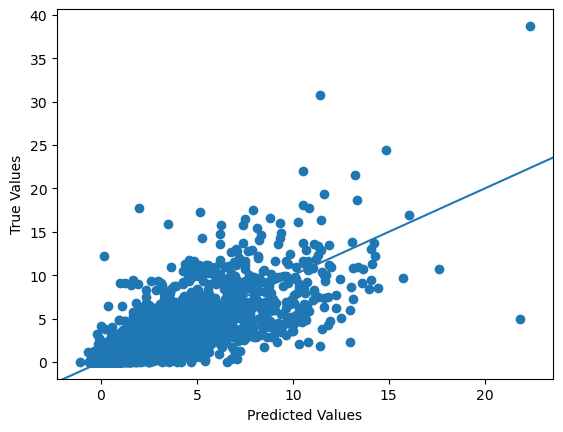

In [9]:
Y_pred = model.predict(X_test)

plt.scatter(Y_pred, Y_test)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_=plt.plot([-100,100],[-100,100])

In [10]:
MSE = mean_squared_error(Y_test, Y_pred)
print("The score is %.5f" % MSE )

The score is 4.00306


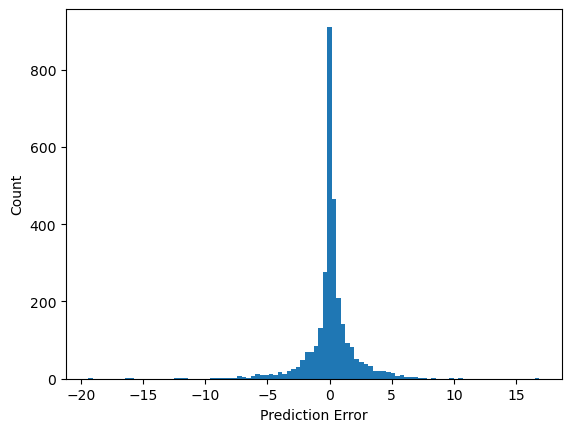

In [11]:
# histogram
error = Y_pred.reshape(3068,1)- Y_test
plt.hist(error,bins = 100)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
_=plt.ylabel("Count")

In [12]:
r2_score(Y_test,Y_pred) 

0.6262138759772766

In [13]:
print('MAE:',metrics.mean_absolute_error(Y_test,Y_pred))

MAE: 1.1238735890925184


In [14]:
mse = mean_squared_error(Y_test, Y_pred)
print(mse)

4.003060421675857


In [15]:

def plot_feature_importance(importance, names):
    '''
    this code is from here: 
    https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    '''
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

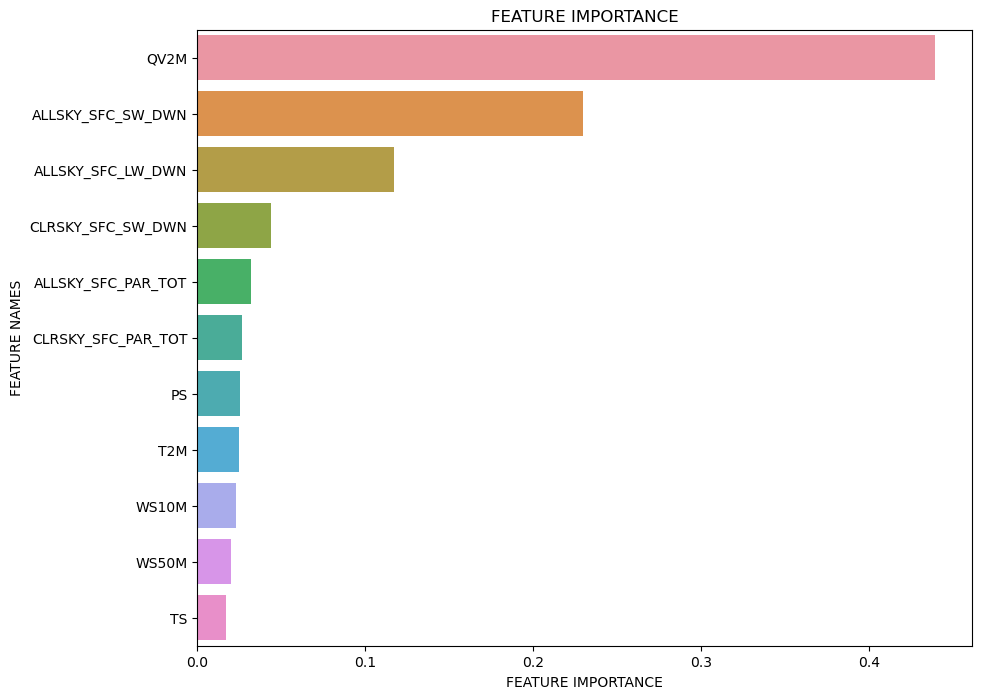

In [16]:
plot_feature_importance(model.feature_importances_, X.columns)